In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'CarPrice_Assignment.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the data-file
car_price = pd.read_csv(file_content_stream)
car_price.head()

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
## Defining the input and target variables
X = car_price[['wheelbase', 'enginesize', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]
Y = car_price['price']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [3]:
## Min-Max transformation
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# First Model

In [5]:
## Defining the model 
md1 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
      tf.keras.layers.Dense(1)  
])

md1.compile(optimizer = 'adam', loss = 'mse')
history = md1.fit(X_train, Y_train, epochs = 100, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/100
2/2 [==============================] - 0s 212ms/step - loss: 236253632.0000 - val_loss: 253878576.0000
Epoch 2/100
2/2 [==============================] - 0s 61ms/step - loss: 236253232.0000 - val_loss: 253878048.0000
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 236252832.0000 - val_loss: 253877600.0000
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 236252384.0000 - val_loss: 253877152.0000
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 236251984.0000 - val_loss: 253876672.0000
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 236251536.0000 - val_loss: 253876176.0000
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 236251104.0000 - val_loss: 253875696.0000
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 236250688.0000 - val_loss: 253875232.0000
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 236250240.0000 

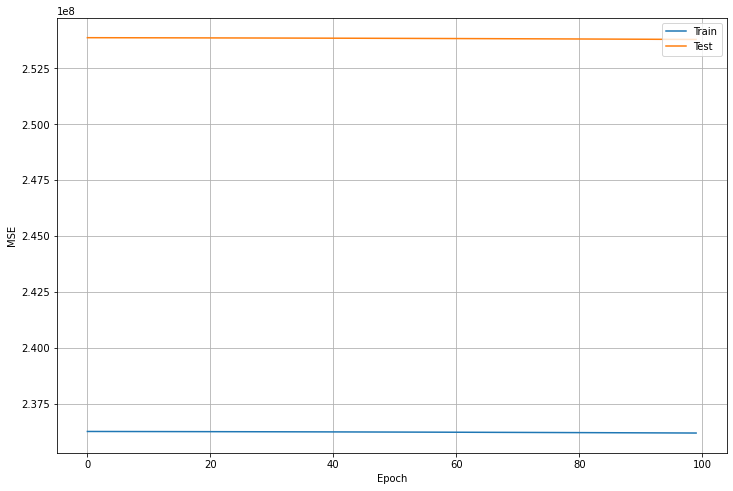

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 8))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.grid()
plt.show();

In [15]:
md1.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 253799296.0000


253799296.0

# Second Model

In [16]:
## Defining the model 
md2 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
      tf.keras.layers.Dense(8, activation = 'relu'),
      tf.keras.layers.Dense(1)  
])

md2.compile(optimizer = 'adam', loss = 'mse')
history = md2.fit(X_train, Y_train, epochs = 100, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/100
2/2 [==============================] - 0s 51ms/step - loss: 236254432.0000 - val_loss: 253879440.0000
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 236254112.0000 - val_loss: 253879040.0000
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 236253776.0000 - val_loss: 253878592.0000
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 236253408.0000 - val_loss: 253878192.0000
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 236253040.0000 - val_loss: 253877744.0000
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 236252640.0000 - val_loss: 253877328.0000
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 236252240.0000 - val_loss: 253876880.0000
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 236251808.0000 - val_loss: 253876368.0000
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 236251392.0000 -

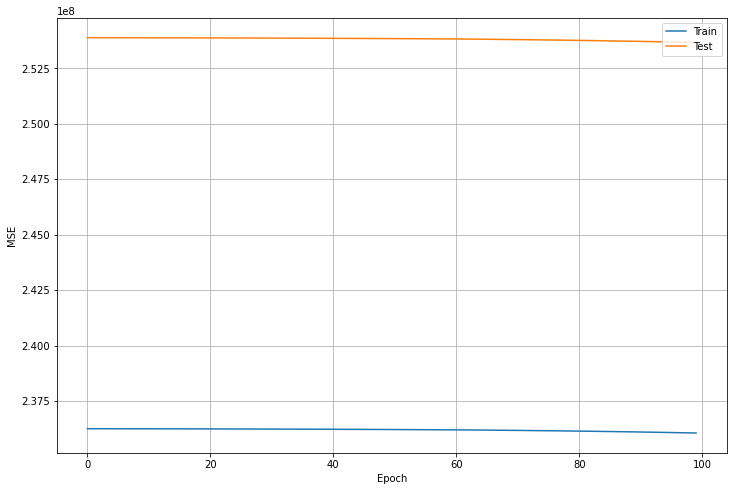

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 8))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.grid()
plt.show();

In [18]:
md2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 253660192.0000


253660192.0

In [ ]:
# The second model has a smaller mse.